# Python for Data Science: Assessment Task 2

- Simon Karumbi - s3455453
- Matthew Saunders - s3782240

_We certify that this is all our own original work. If we took any parts from elsewhere, then they were non-essential parts of the assignment, and they are clearly attributed in our submission. We will show we agree to this honor code by typing “Yes”: Yes_

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 1000)

%matplotlib inline

### Avila dataset
This data in this dataset are part of a paleographic analysis of 8000 pages from the 'Avila Bible'. Manuscript pages are written by 12 copyists, which is the target class.

In [2]:
names = []
for i in range(10):
    names.append('F' + str(i+1))
    
names.append('Class')

In [3]:
avila_X = pd.read_csv('avila/avila-tr.txt', header=0, names=names)
avila_y = pd.read_csv('avila/avila-ts.txt', header=0, names=names)

In [4]:
avila_X.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Class
0,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
1,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
2,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
3,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
4,0.117948,-0.220579,-3.210528,-1.623238,0.261718,-0.349509,0.257927,-0.385979,-0.247731,-0.331310,A


In [5]:
avila_y.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Class
0,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
1,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
2,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
3,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A
4,0.068573,-0.181323,-3.210528,-0.294311,-1.168333,0.356414,-0.006326,-0.219550,0.126447,0.448186,F


In [6]:
avila = pd.concat([avila_X, avila_y], ignore_index=True)

In [7]:
avila.shape

(20865, 11)

In [8]:
avila.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
count,20865.000000,20865.000000,20865.000000,20865.000000,20865.000000,20865.000000,20865.000000,20865.000000,20865.000000,20865.000000
mean,0.000155,0.018496,0.002303,0.000034,0.000228,0.002472,0.003951,-0.000008,0.002102,0.000010
std,0.999760,2.853253,1.058250,1.000004,0.999461,1.065199,1.153377,1.000030,1.045411,1.000029
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.527256,0.172340,-0.598658,-0.044076,-0.543924,-0.372457,-0.515248
50%,0.056229,-0.055704,0.217845,0.089437,0.261718,-0.058835,0.220177,0.108279,0.064084,-0.025954
75%,0.204355,0.203385,0.352988,0.643738,0.261718,0.564038,0.446679,0.648765,0.500624,0.528401
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,11.911338


## Data Preparation
The dataset has been normalised using Z normalisation as per the dataset description: **x' = (x - μ) / σ**.

There are some strange outliers in some columns and there are no **null**, nor **n/a** values.

In order to maximise data utilisation, the test and training datasets were combined, where the datasets will be split later with different proportions.

There are some rows and columns within the dataset which should not be removed, as it will result in the removal of particular copyists from the target class.

In [9]:
# Dropping an extreme outlier in F2
avila = avila[~(avila['F2'] > 100)]

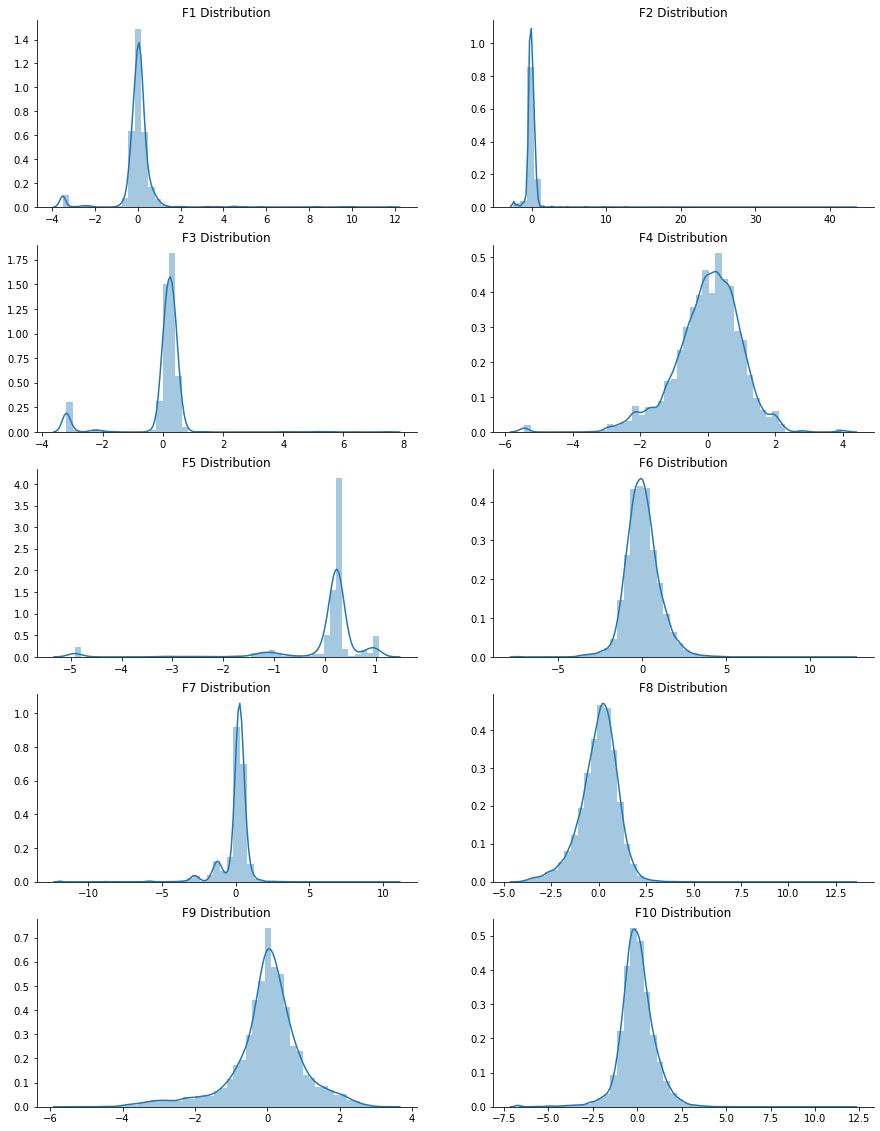

In [10]:
plt.subplots(5, 2, figsize=(15,20))

plotnumber = 1

for col in avila.select_dtypes(exclude='object'):
    if plotnumber < len(avila.columns) + 1:
        plt.subplot(5, 2, plotnumber)
        
        sns.distplot(avila[col])
        sns.despine()
        
        plt.title('{feature} Distribution'.format(feature=col), pad=-2)
        plt.xlabel(None)
        plt.ylabel(None)
        
    plotnumber += 1
    
plt.show()

Some of the data doesn't seem to follow a standardised normal distribution, with a large number of data points across different columns appearing more than 5 standard deviations away from the mean. It was decided to set all data points that are greater than 5 standard deviations to the population mean 0 (mu) to minimise outliers affecting the result of predictions. 

In [11]:
for i in avila.select_dtypes(exclude ='object'):
    avila[i][avila[i] > 5] = 0
    avila[i][avila[i] < -5] = 0

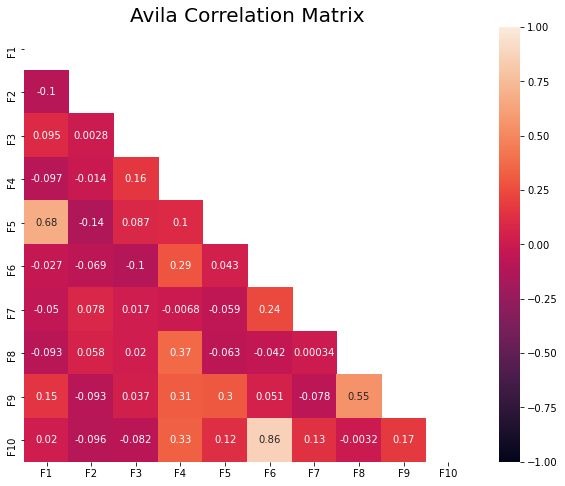

In [12]:
plt.figure(figsize = (10, 8))

corr = avila.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(avila.corr(), vmin=-1, vmax=1, annot=True, mask=mask)

plt.title('Avila Correlation Matrix', pad=5, fontdict={'fontsize':20} )

plt.show()

Feature 6 and 10 seem to have a high correlation, and after some investigation it seems that feature 10 is derived from feature 6 and another feature as a ratio. As this doesn't seem to add much value to the dataset, it was decided that this feature was to be removed.

In [13]:
avila.drop(columns='F10', inplace=True)
avila.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,20864.000000,20864.000000,20864.000000,20864.000000,20864.000000,20864.000000,20864.000000,20864.000000,20864.000000
mean,-0.038448,-0.052945,-0.021900,0.020885,0.000228,0.000355,0.040209,-0.000653,0.000758
std,0.795311,0.504414,0.931493,0.941348,0.999485,0.984832,0.787730,0.995884,0.998033
min,-3.498799,-2.426761,-3.210528,-3.441837,-4.922215,-4.668092,-4.989381,-4.247781,-4.737863
25%,-0.128929,-0.259834,0.061363,-0.523467,0.172340,-0.598658,-0.044076,-0.543943,-0.372457
50%,0.043885,-0.055704,0.214288,0.089437,0.261718,-0.058835,0.220177,0.108240,0.064084
75%,0.204355,0.203385,0.352988,0.643738,0.261718,0.564038,0.446679,0.648488,0.500624
max,4.969080,4.835583,4.329047,3.987152,1.066121,4.965672,4.901228,4.580832,3.244594


In [14]:
avila['Class'].value_counts()

A    8570
F    3923
E    2190
I    1663
X    1044
H    1039
G     893
D     705
Y     533
C     206
W      88
B      10
Name: Class, dtype: int64

## Exploratory Data Analysis

Before we perform Exploratory Data Analysis, we need to split the training and test data, as we shouldn't explore the test data.

In [15]:
X = avila.iloc[:,:-1]
y = avila['Class']

print(X.shape)
print(y.shape)

(20864, 9)
(20864,)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Target Feature
There are some under-represented values in the target class (W and B are of particular concern). Dealing with these values is outside the scope of this project.

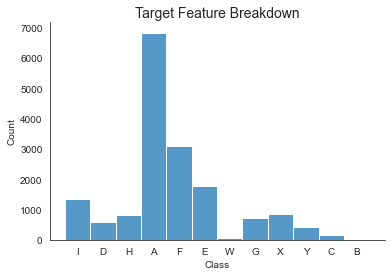

In [17]:
sns.set_style('white')

sns.histplot(y_train)
sns.despine()

plt.title('Target Feature Breakdown', pad=5, fontdict={'fontsize':14})

plt.show()

In [18]:
y_train.value_counts()

A    6833
F    3109
E    1776
I    1343
X     848
H     821
G     710
D     577
Y     426
C     169
W      69
B      10
Name: Class, dtype: int64

### Feature Distributions

We can see now that most features follow a standard normal distribution, appropriate for data modelling.

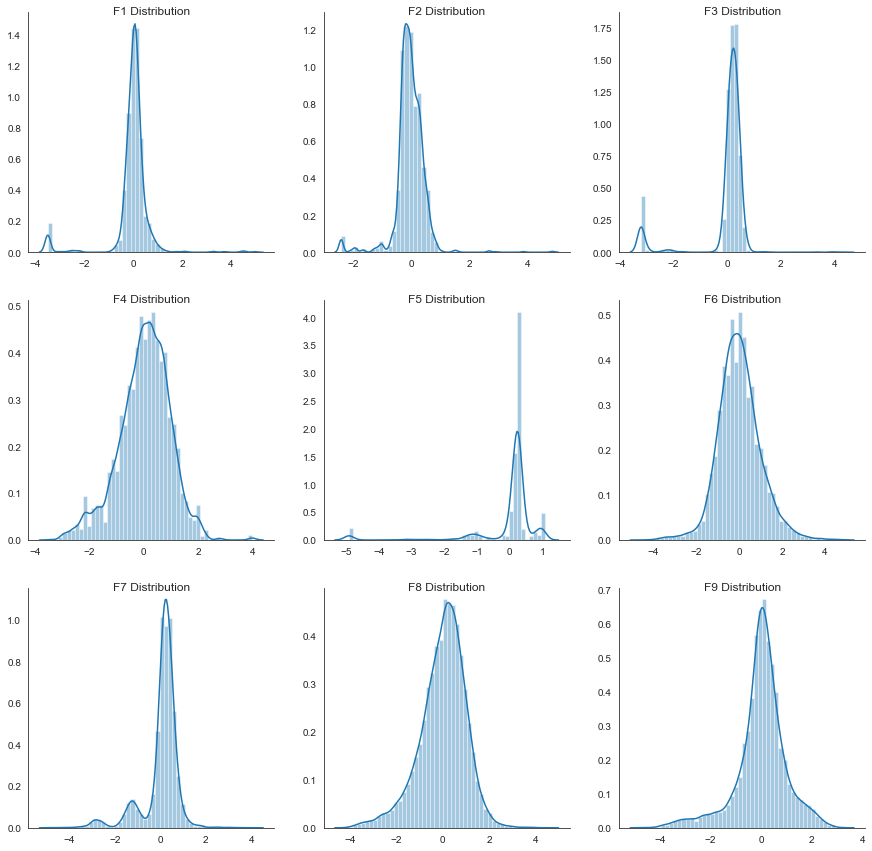

In [19]:
plt.subplots(5, 2, figsize=(15,15))

plotnumber = 1

for col in X_train.columns:
    if plotnumber < len(X_train.columns) + 1:
        plt.subplot(3, 3, plotnumber)
        
        sns.distplot(X_train[col])
        sns.despine()
        
        plt.title('{feature} Distribution'.format(feature=col), pad=-2)
        plt.xlabel(None)
        plt.ylabel(None)
        
    plotnumber += 1
    
plt.show()

### Feature Correlation
We can see that there are still some features that have a high correlation, however, it was decided to keep those features for the purpose of modelling.

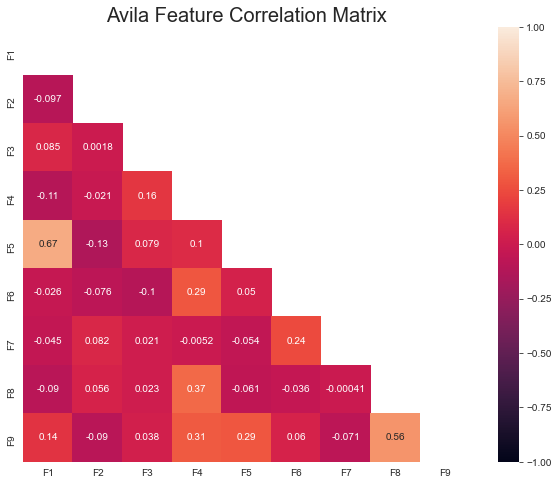

In [20]:
plt.figure(figsize = (10, 8))

corr = X_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, vmin=-1, vmax=1, annot=True, mask=mask)

plt.title('Avila Feature Correlation Matrix', pad=5, fontdict={'fontsize':20} )

plt.show()

## Data Modelling
### DBSCAN Clustering

In [21]:
from sklearn.cluster import DBSCAN

X_train_copy = X_train.copy()

# Using the min points equal to two times the dimensions in the dataset
dbscan = DBSCAN(eps=0.5, min_samples=18).fit(X_train_copy)

In [22]:
X_train_copy['cluster'] = dbscan.labels_
X_train_copy['target'] = y_train
X_train_copy['count'] = 'count'

X_train_copy.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,cluster,target,count
3213,0.475920,-0.432560,0.114709,-0.870960,0.976743,-1.138481,-1.403091,0.772324,1.591976,-1,I,count
19222,-0.770809,-0.110662,0.328093,0.262050,0.172340,2.017408,1.390440,-1.092603,-0.871360,-1,D,count
19873,0.056229,0.054213,0.392108,-0.028960,0.261718,-0.432558,0.182426,0.221704,0.781258,0,H,count
16460,-2.215039,-0.173471,3.941399,-1.569410,-2.509005,-3.297773,-0.459331,-0.558835,-1.993893,-1,A,count
3641,-0.005490,-0.204876,0.320980,-0.694588,0.261718,0.024215,-0.232828,0.154313,0.188810,0,F,count


In [23]:
classification_result = X_train_copy[['cluster', 'target', 'count']].groupby(['cluster', 'target']).agg('count')
classification_result.reset_index(inplace=True)
classification_result

,cluster,target,count
0,-1,A,3862
1,-1,B,10
2,-1,C,121
3,-1,D,421
4,-1,E,1286
5,-1,F,1284
6,-1,G,318
7,-1,H,395
8,-1,I,1321
9,-1,W,69


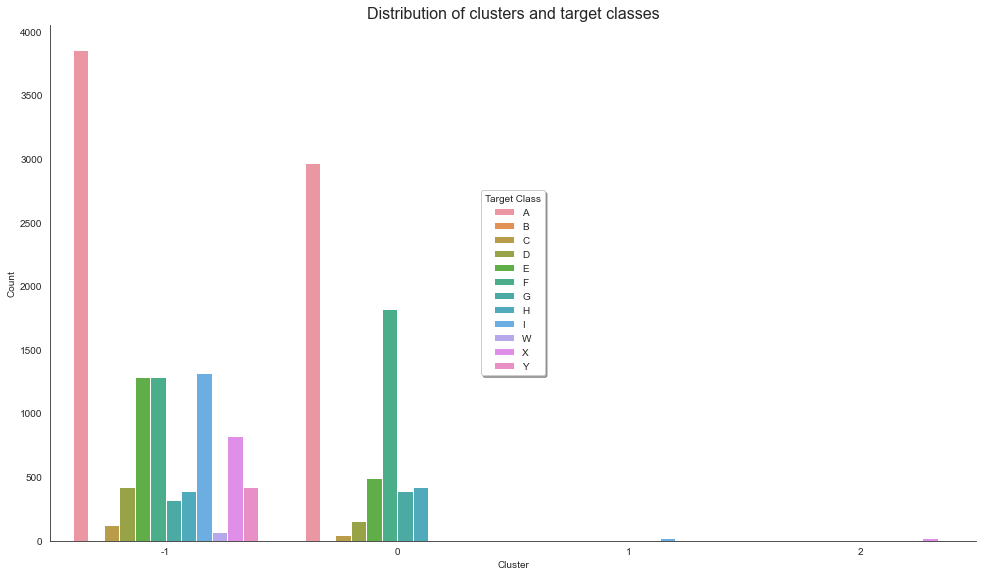

In [24]:
ax = sns.catplot(data=classification_result, x='cluster', y='count', hue='target', kind='bar', legend=False)
ax.fig.set_figwidth(15)
ax.fig.set_figheight(8)
ax.set_axis_labels('Cluster', 'Count')

plt.title('Distribution of clusters and target classes', fontdict={'fontsize':16})
plt.legend(title='Target Class', loc='center', shadow='True')

plt.show()

In [25]:
ct = pd.crosstab(X_train_copy['target'], X_train_copy['cluster'])
print(ct)

cluster    -1     0   1   2
target                     
A        3862  2971   0   0
B          10     0   0   0
C         121    48   0   0
D         421   156   0   0
E        1286   490   0   0
F        1284  1825   0   0
G         318   392   0   0
H         395   426   0   0
I        1321     0  22   0
W          69     0   0   0
X         827     1   0  20
Y         425     1   0   0


### Dimensionality reduction through PCA 
In order to visualise the data more effectively, we can employ Principal Component Analysis to reduce the data into principal components that best describe the variation within the data. This may assist us in visualising the clusters formed through the DBSCAN model.

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

principal_components = pca.fit_transform(X_train)

pca_df = pd.DataFrame(data = principal_components
             , columns = ['pc1', 'pc2', 'pc3'])

Here we are plotting the resulting labels of the first iteration of the DBSCAN model, to understand how the data might be clustered.

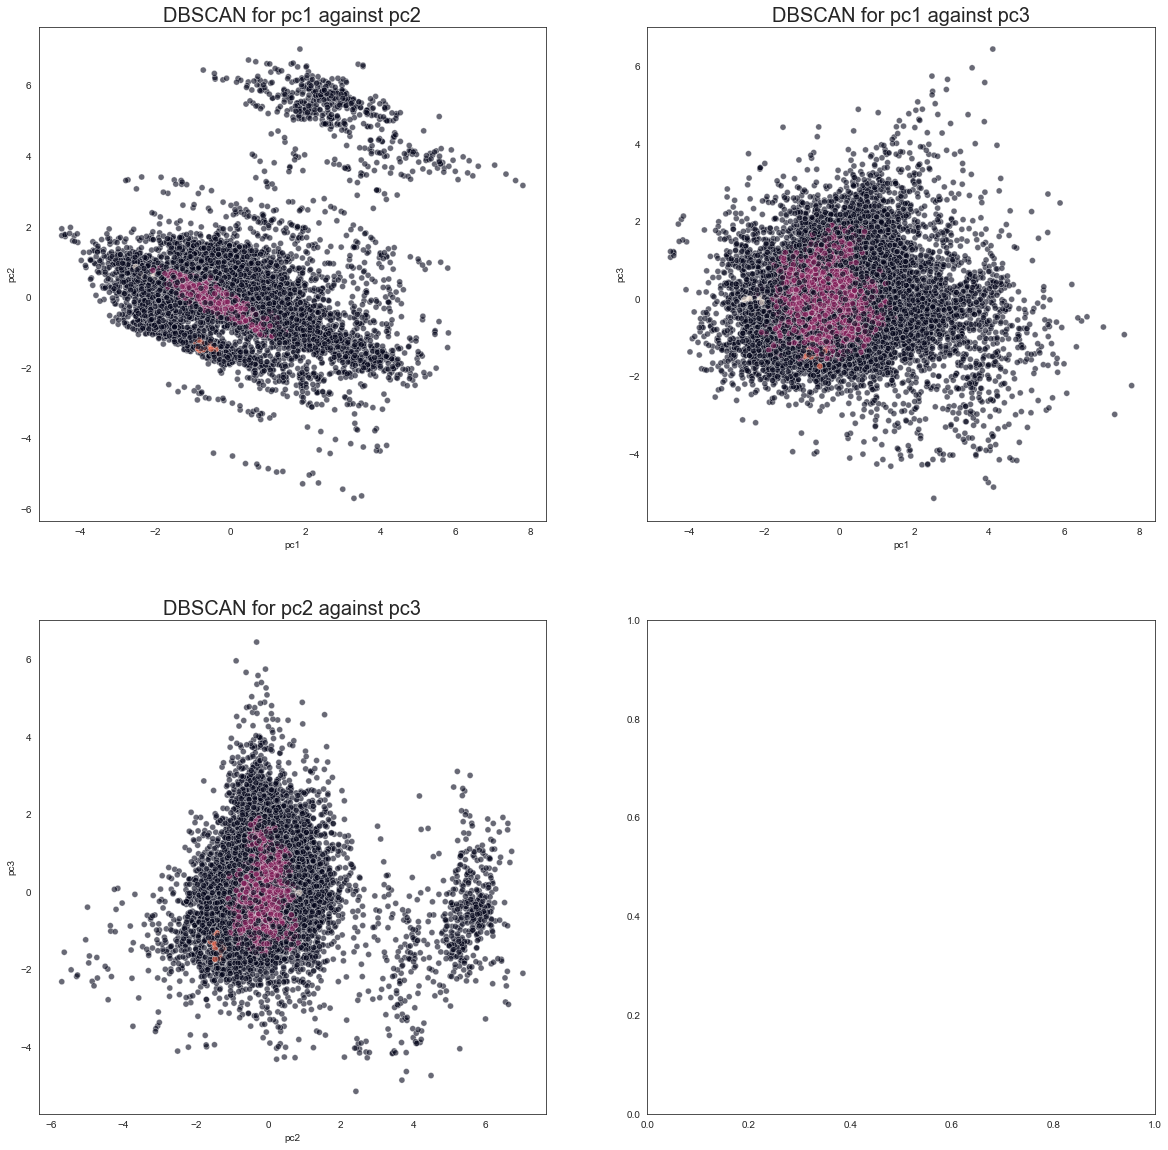

In [27]:
plt.subplots(2, 2, figsize=(20,20))

plotnumber = 1

for i in range(3):
    for j in range(2):
        if (i != j and i > j):
            plt.subplot(2, 2, plotnumber)
            sns.scatterplot(pca_df.iloc[:,j], pca_df.iloc[:,i], c=dbscan.labels_, alpha=0.6)

            plt.title('DBSCAN for {} against {}'.format(pca_df.columns[j], pca_df.columns[i]), 
                      pad=5, 
                      fontdict={'fontsize':20})
            plotnumber +=1

We can see some clusters appearing in the dataset, however, there are still quite a few data points that are being plotted as noise. We need to further fine tune eps in order to best fit this model to the data.

### DBSCAN Hyperparameter tuning
We can use a K Distance Graph to discern the optimal values for epsilon. Wherever an elbow appears in the graph shows an optimal value for epsilon. This code is referenced from K Distance example in lecture notes.

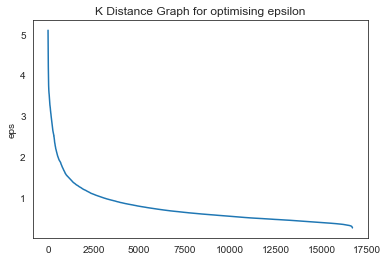

In [28]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors().fit(X_train)
distances, indices = knn.kneighbors(X_train, 20)
kDis = distances[:,10]
kDis.sort()
kDis = kDis[list(range(len(kDis) - 1, 0, -1 ))]

plt.plot(kDis)
plt.title('K Distance Graph for optimising epsilon')
plt.ylabel('eps')

plt.show()

From the graph, we can observe that the elbow occurs somewhere around eps=2, and we can interpret somewhere within this range to be the optimal value. Let us iterate over several values of epsilon to understand the value that best fits the training data and best predicts the test data. 

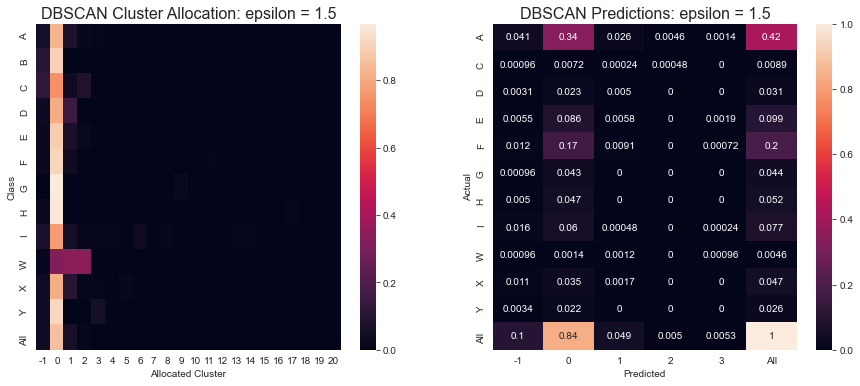

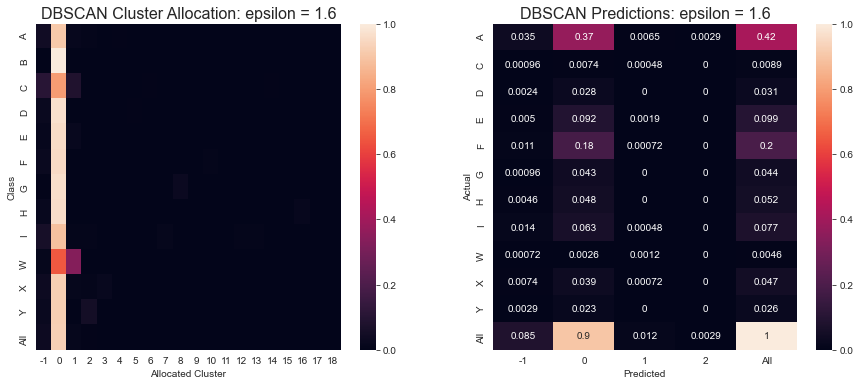

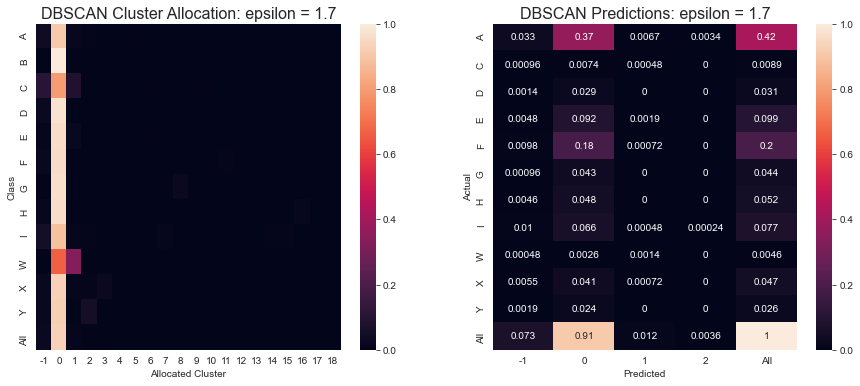

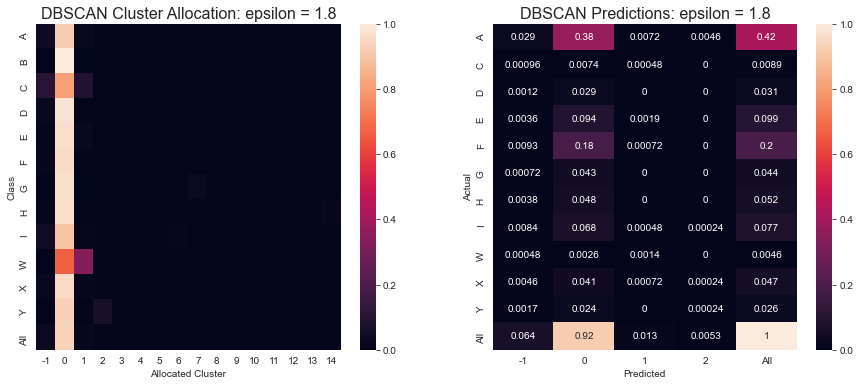

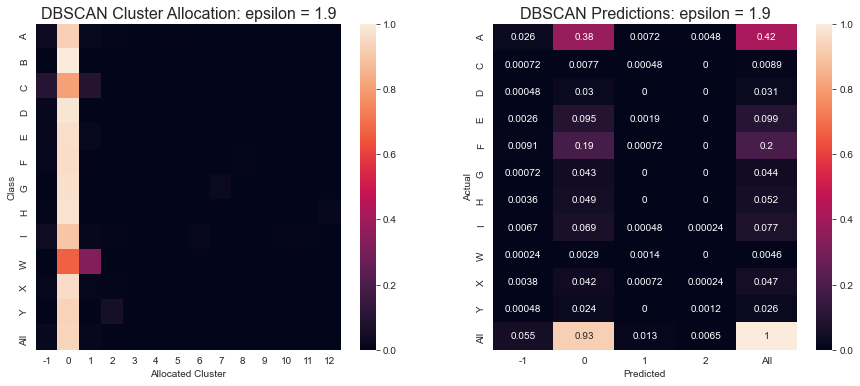

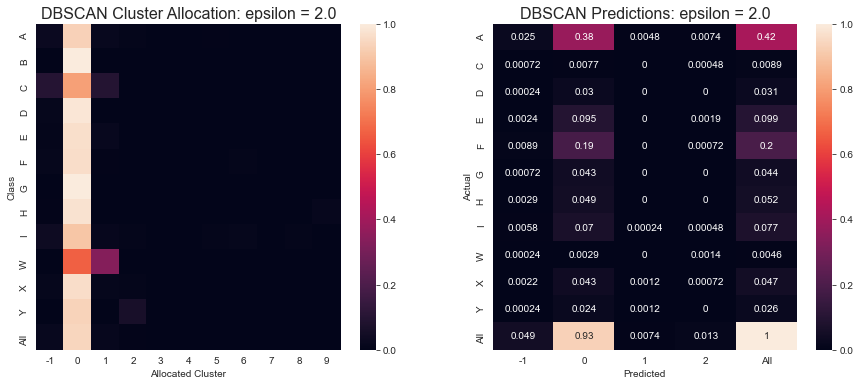

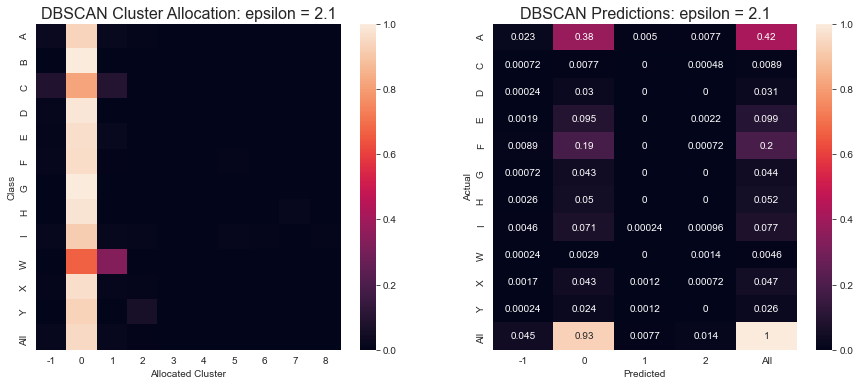

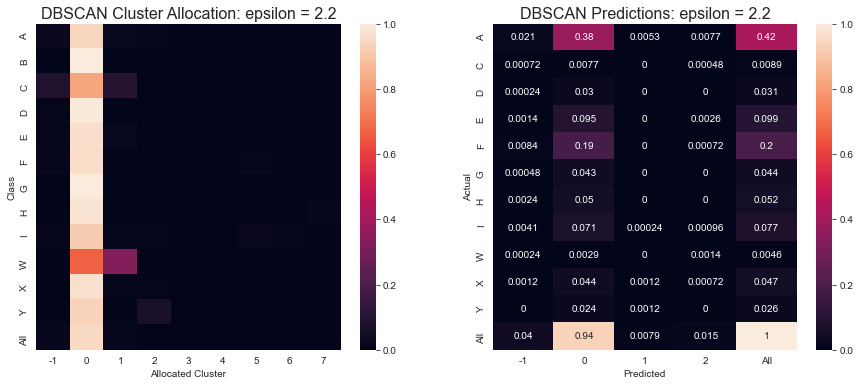

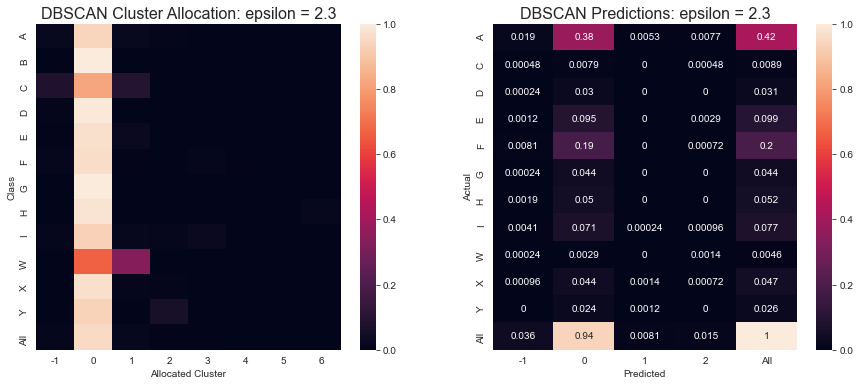

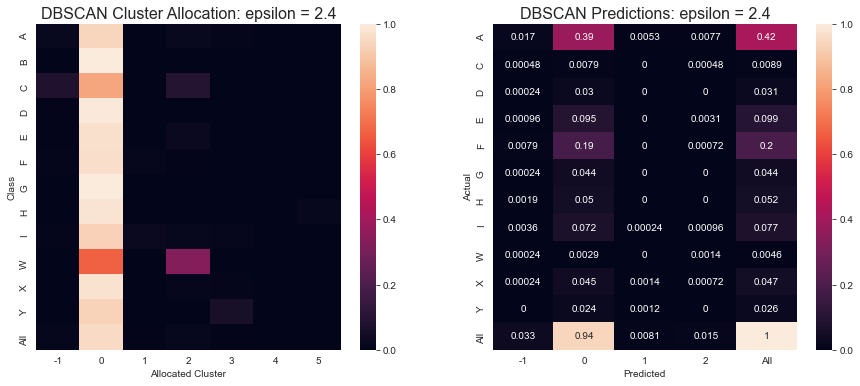

In [29]:
plotnumber = 1

for i in range (15, 25):
    
    plt.subplots(1, 2, figsize=(15,6))
    
    eps = round(0.1 * i, 1)
    
    # Fitting the algorithm to the epsilon value
    dbscan = DBSCAN(eps=eps, min_samples=12).fit(X_train)
    dbscan_labels = dbscan.labels_
    
    # Creating a confusion matrix for the fitting of the algorithm 
    ct = pd.crosstab(y_train, dbscan_labels, margins=True, normalize='index')

    # Showing the confusion matrix as a heatmap
    plt.subplot(1, 2, plotnumber)
    
    sns.heatmap(ct)
    plt.title('DBSCAN Cluster Allocation: epsilon = {}'.format(eps), pad=5, fontdict={'fontsize':16})
    plt.xlabel('Allocated Cluster')
    
    # Using the model to make predictions on the test data
    dbscan_predict = dbscan.fit_predict(X_test, y_test)
    ct_predict = pd.crosstab(y_test, dbscan_predict, margins=True, normalize='all')
    
    # Showing the results of the predictions
    plt.subplot(1, 2, plotnumber+1)

    sns.heatmap(ct_predict, annot=True)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('DBSCAN Predictions: epsilon = {}'.format(eps), pad=5, fontdict={'fontsize':16})
    
    plt.show()

It seems that when eps=1.5 the number of clusters predicted is the best, and when eps=1.9, the correct number of clusters is fit.

In [30]:
dbscan = DBSCAN(eps=1.5, min_samples=12).fit(X_train)
dbscan_labels = dbscan.labels_

In [31]:
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_dbscan = list(dbscan_labels).count(-1)

In [32]:
print('Number of clusters: {}'.format(n_clusters_dbscan))
print('Number of noisy data points: {}'.format(n_noise_dbscan))

Number of clusters: 21
Number of noisy data points: 690


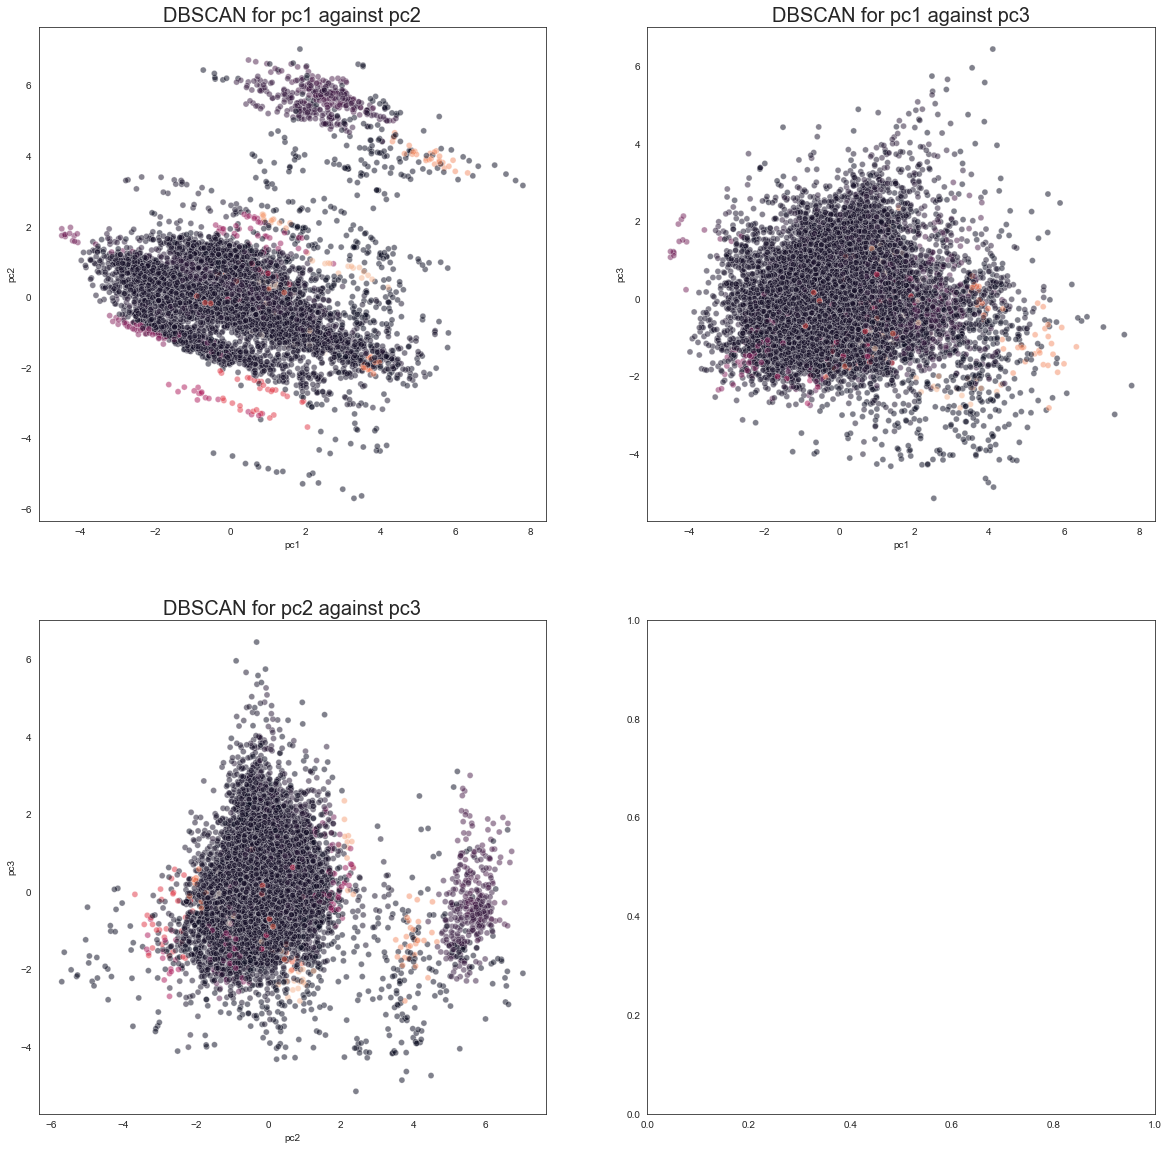

In [33]:
plt.subplots(2, 2, figsize=(20,20))

plotnumber = 1

for i in range(3):
    for j in range(2):
        if (i != j and i > j):
            plt.subplot(2, 2, plotnumber)
            sns.scatterplot(pca_df.iloc[:,j], pca_df.iloc[:,i], c=dbscan_labels, alpha=0.5)

            plt.title('DBSCAN for {} against {}'.format(pca_df.columns[j], pca_df.columns[i]), 
                      pad=5, 
                      fontdict={'fontsize':20})
            plotnumber +=1

#### Creating a confusion matrix for DBSCAN

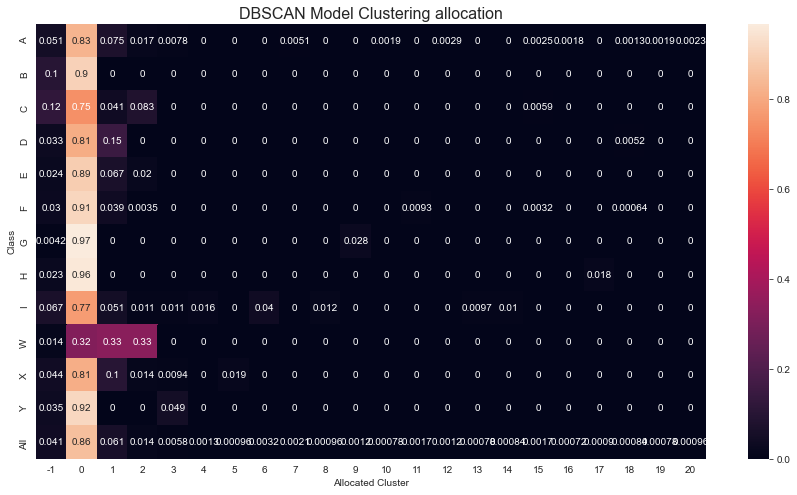

In [34]:
ct = pd.crosstab(y_train, dbscan_labels, margins=True, normalize='index')

plt.figure(figsize = (15, 8))

sns.heatmap(ct, annot=True)
plt.title('DBSCAN Model Clustering allocation', pad=5, fontdict={'fontsize':16})
plt.xlabel('Allocated Cluster')
plt.show()

In [35]:
dbscan_predict = dbscan.fit_predict(X_test, y_test)
ct_predict = pd.crosstab(y_test, dbscan_predict, margins=True, normalize='all')

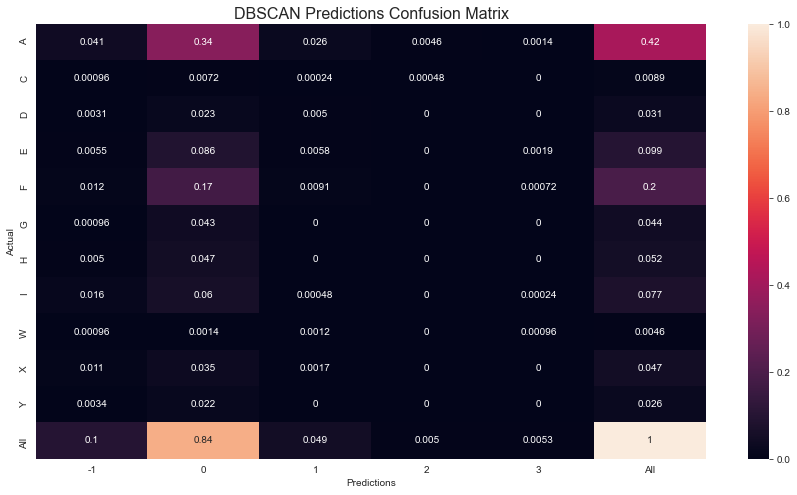

In [36]:
plt.figure(figsize = (15, 8))

sns.heatmap(ct_predict, annot=True)

plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('DBSCAN Predictions Confusion Matrix', pad=5, fontdict={'fontsize':16})
plt.show()

## K-Means

In [37]:
from sklearn.cluster import KMeans
    
kmeans = KMeans(n_clusters=12, random_state=0)
results = kmeans.fit(X_train)
labels = results.labels_

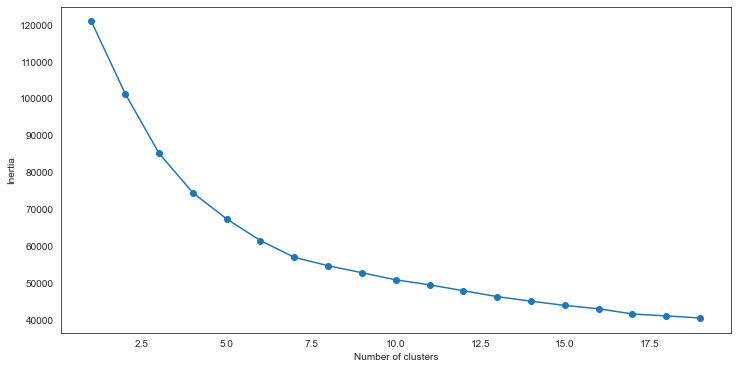

In [38]:
SSE = []

for cluster in range(1,20):
    kmeans = KMeans(n_jobs=-1, n_clusters=cluster, init='k-means++')
    kmeans.fit(X_train)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.show()

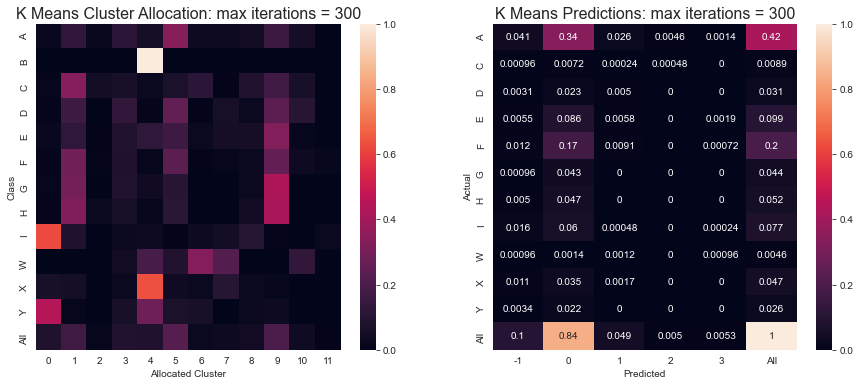

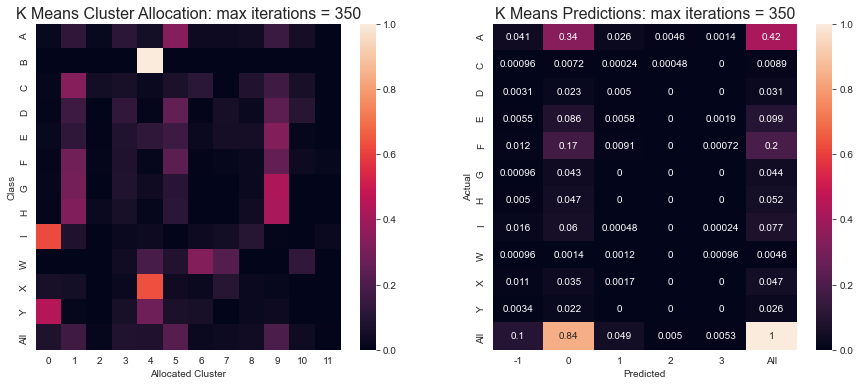

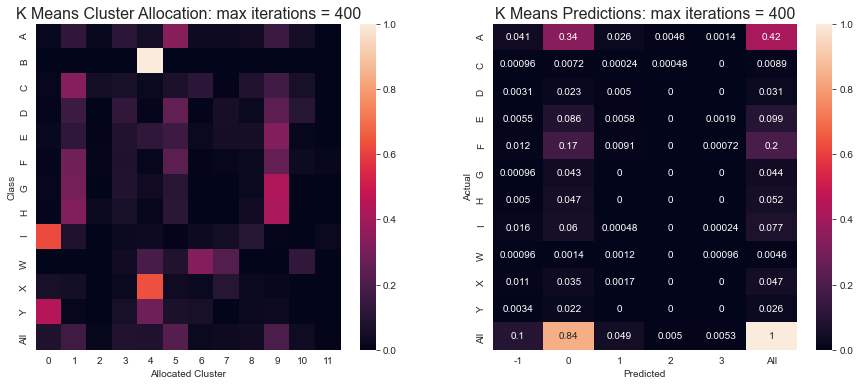

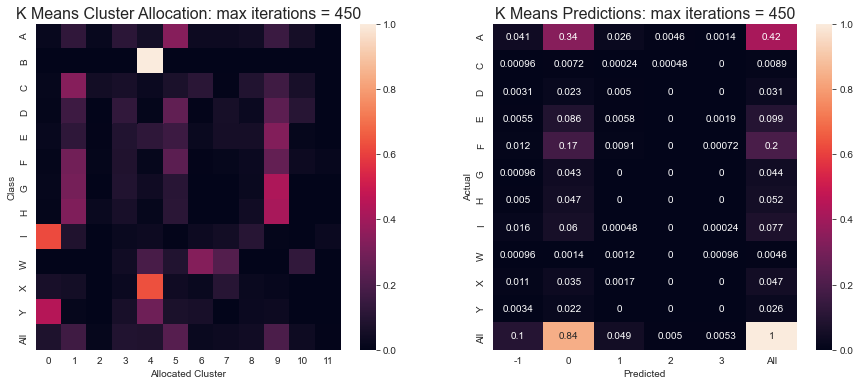

In [39]:
plotnumber = 1

for i in range(250, 450, 50):
    
    plt.subplots(1, 2, figsize=(15,6))
    
    max_iter = i + 50
    
    # Fitting the algorithm to the epsilon value
    kmeansTwo = KMeans(n_clusters=12, random_state=0, max_iter=max_iter)
    resultsTwo = kmeansTwo.fit(X_train)
    labelsTwo = resultsTwo.labels_
    
    # Creating a confusion matrix for the fitting of the algorithm 
    ct = pd.crosstab(y_train, labelsTwo, margins=True, normalize='index')

    # Showing the confusion matrix as a heatmap
    plt.subplot(1, 2, plotnumber)
    
    sns.heatmap(ct)
    plt.title('K Means Cluster Allocation: max iterations = {}'.format(max_iter), pad=5, fontdict={'fontsize':16})
    plt.xlabel('Allocated Cluster')
    
    # Using the model to make predictions on the test data
    kmeans_predict = kmeansTwo.fit_predict(X_test, y_test)
    ct_predict_kmeans = pd.crosstab(y_test, kmeans_predict, margins=True, normalize='all')
    
    # Showing the results of the predictions
    plt.subplot(1, 2, plotnumber+1)

    sns.heatmap(ct_predict, annot=True)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('K Means Predictions: max iterations = {}'.format(max_iter), pad=5, fontdict={'fontsize':16})
    
    plt.show()

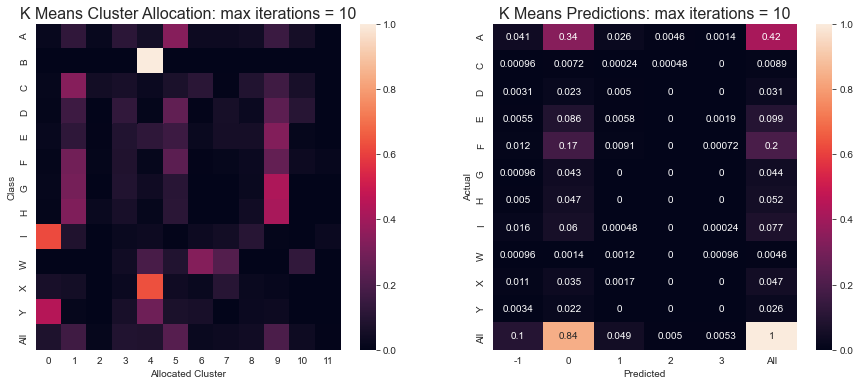

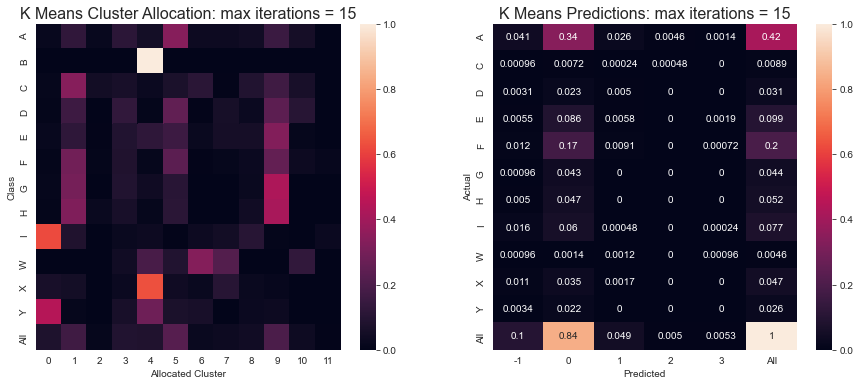

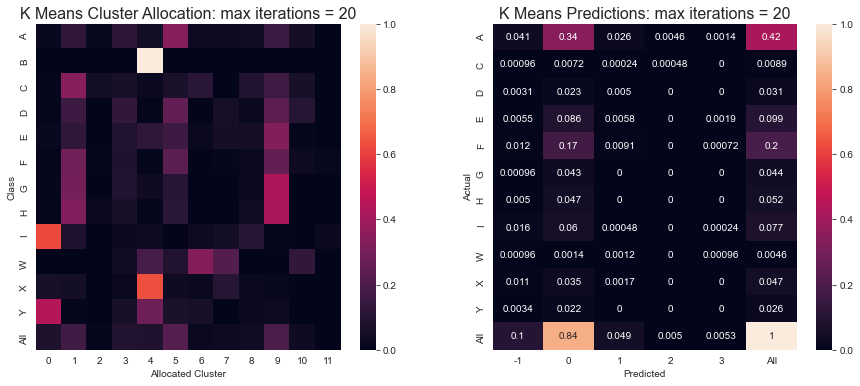

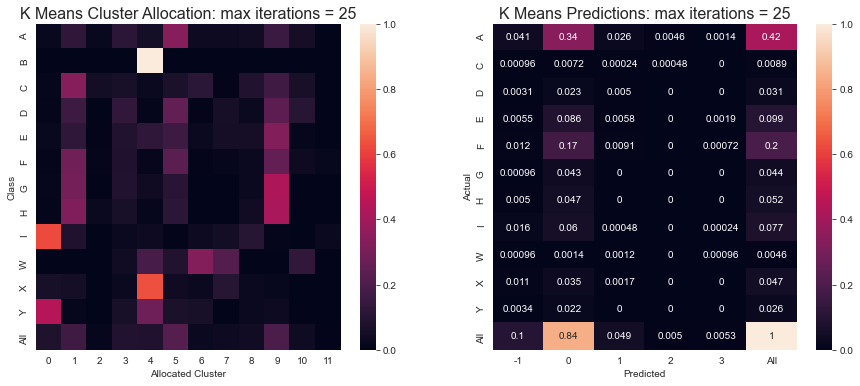

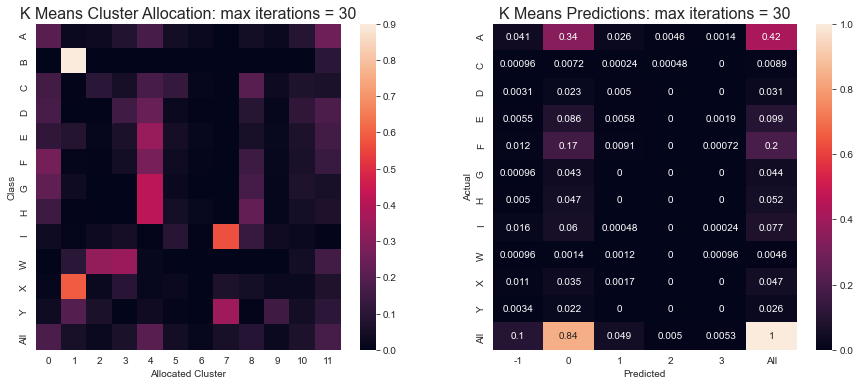

In [40]:
plotnumber = 1

for i in range(5, 30, 5):
    
    plt.subplots(1, 2, figsize=(15,6))
    
    n_init = i + 5
    
    # Fitting the algorithm to the epsilon value
    kmeansTwo = KMeans(n_clusters=12, random_state=0, n_init=n_init)
    resultsTwo = kmeansTwo.fit(X_train)
    labelsTwo = resultsTwo.labels_
    
    # Creating a confusion matrix for the fitting of the algorithm 
    ct = pd.crosstab(y_train, labelsTwo, margins=True, normalize='index')

    # Showing the confusion matrix as a heatmap
    plt.subplot(1, 2, plotnumber)
    
    sns.heatmap(ct)
    plt.title('K Means Cluster Allocation: max iterations = {}'.format(n_init), pad=5, fontdict={'fontsize':16})
    plt.xlabel('Allocated Cluster')
    
    # Using the model to make predictions on the test data
    kmeans_predict = kmeansTwo.fit_predict(X_test, y_test)
    ct_predict_kmeans = pd.crosstab(y_test, kmeans_predict, margins=True, normalize='all')
    
    # Showing the results of the predictions
    plt.subplot(1, 2, plotnumber+1)

    sns.heatmap(ct_predict, annot=True)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('K Means Predictions: max iterations = {}'.format(n_init), pad=5, fontdict={'fontsize':16})
    
    plt.show()

In [41]:
X_train_kmeans = X_train
X_train_kmeans["cluster"] = results.predict(X_train_kmeans)
X_train_kmeans["target"] = y_train
X_train_kmeans["c"] = "forCounting"

kmeans_results = X_train_kmeans[["cluster", "target", "c"]].groupby(["cluster", "target"]).agg("count")
kmeans_results.reset_index(inplace=True)
print(kmeans_results)

     cluster target     c
0          0      A   153
1          0      C     2
2          0      D     5
3          0      E    35
4          0      F    34
5          0      G     9
6          0      H     8
7          0      I   837
8          0      X    53
9          0      Y   190
10         1      A   870
11         1      C    57
12         1      D    94
13         1      E   219
14         1      F   900
15         1      G   213
16         1      H   264
17         1      I   115
18         1      X    46
19         1      Y     6
20         2      A   157
21         2      C     8
22         2      E     7
23         2      F    25
24         2      H    20
25         2      I     5
26         3      A   782
27         3      C    11
28         3      D    75
29         3      E   158
30         3      F   256
31         3      G    63
32         3      H    52
33         3      I    35
34         3      W     3
35         3      X    26
36         3      Y    27
37         4

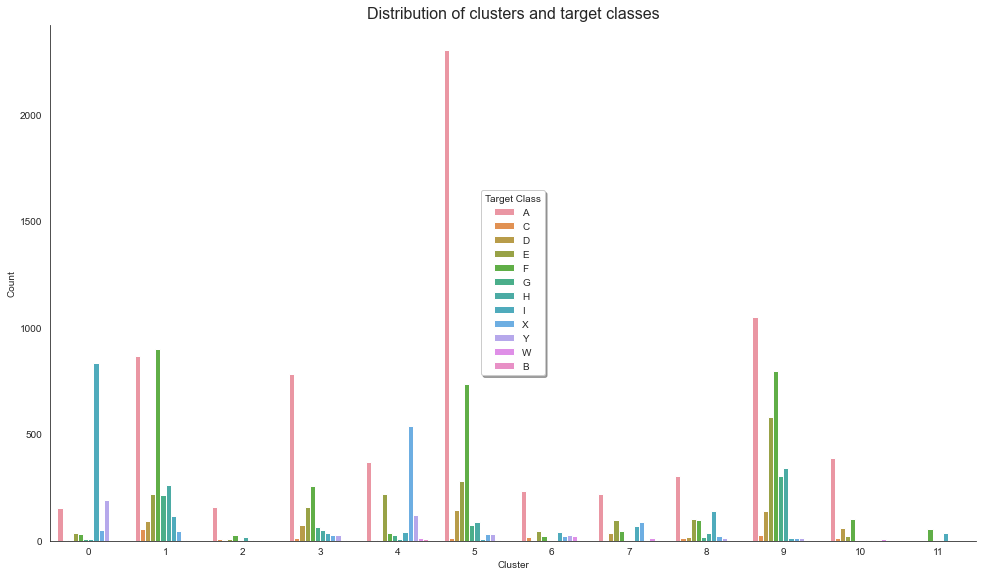

In [42]:
ax = sns.catplot(data=kmeans_results, x="cluster", y="c", hue="target", kind='bar', legend=False)
ax.fig.set_figwidth(15)
ax.fig.set_figheight(8)
ax.set_axis_labels('Cluster', 'Count')

plt.title('Distribution of clusters and target classes', fontdict={'fontsize':16})
plt.legend(title='Target Class', loc='center', shadow='True')

plt.show()

### Visualising K Means Cluster membership

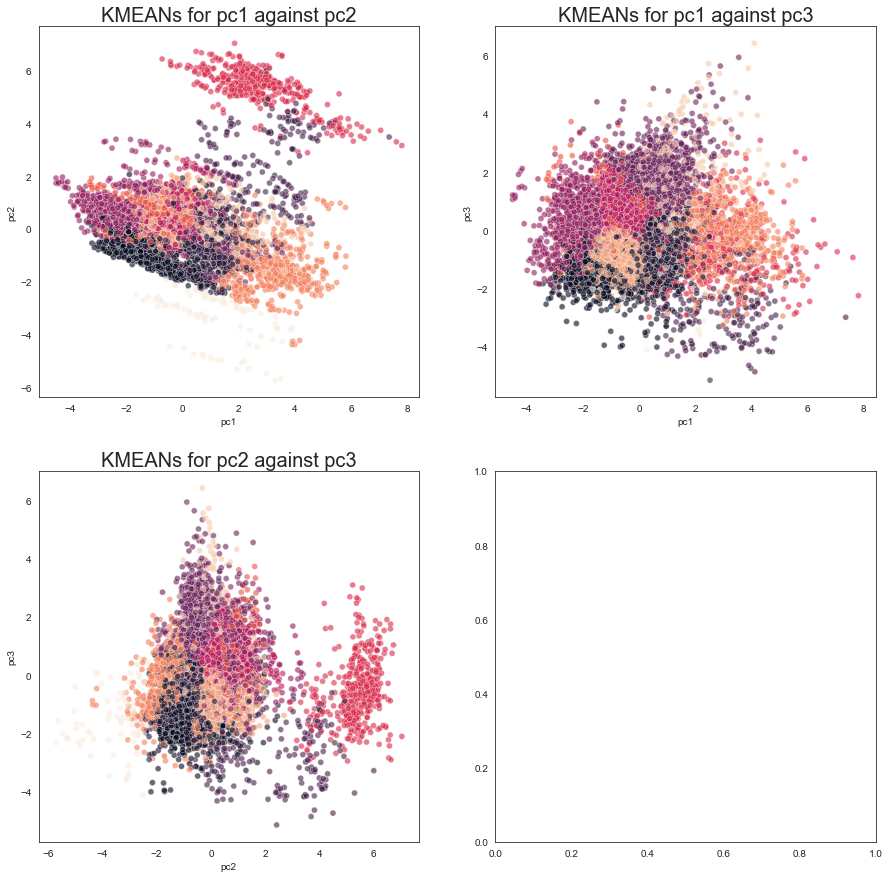

In [48]:
plt.subplots(2, 2, figsize=(15,15))

plotnumber = 1

for i in range(3):
    for j in range(2):
        if (i != j and i > j):
            plt.subplot(2, 2, plotnumber)
            sns.scatterplot(pca_df.iloc[:,j], pca_df.iloc[:,i], c=labels, alpha=0.6 )

            plt.title('KMEANs for {} against {}'.format(pca_df.columns[j], pca_df.columns[i]), 
                      pad=5, 
                      fontdict={'fontsize':20})
            plotnumber +=1

In [44]:
kmeans_predict = kmeans.fit_predict(X_test, y_test)
ct_predict_kmeans = pd.crosstab(y_test, kmeans_predict, margins=True, normalize='all')

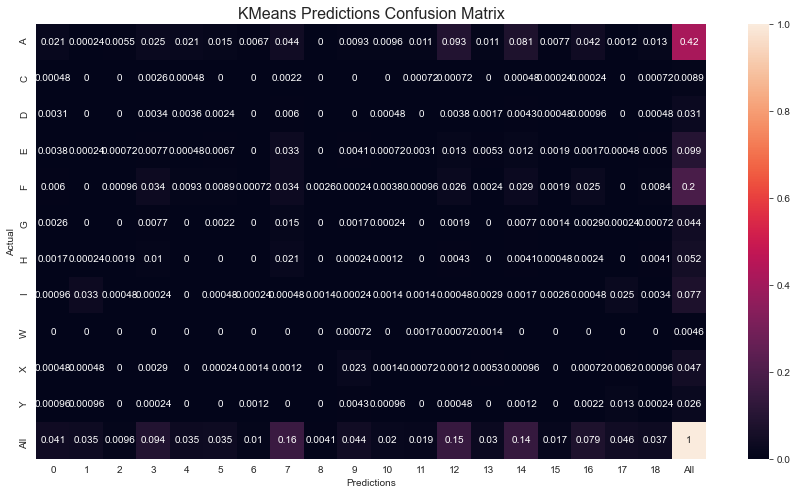

In [45]:
plt.figure(figsize = (15, 8))

sns.heatmap(ct_predict_kmeans, annot=True)

plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('KMeans Predictions Confusion Matrix', pad=5, fontdict={'fontsize':16})\

plt.show()